<a href="https://colab.research.google.com/github/guiaustregesilo-ds/Loyalty-Program-with-Clustering/blob/main/c0_1_gca_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **High Value Customer Identification**

## 0.0 Planning

### Input

**1 - Business Problem**:
  - Selecting the most valuable customers to be included in a loyalty program.

**2 - Dataset**
  - Online e-commerce sales over a one-year period.

### Output

**1 -  Identifying the participants for the "Royalty" program."**
  - Lista: client_id | id_royalty
            1234     | yes/R
            4567     | no/R

**2 - Business Questions Report: Royalty Program**

    - 1. Who are the people eligible to participate in the program?"

    - 2.  How many customers will be in the group?

    - 3. What are the main characteristics of these customers?

    - 4. What is the revenue contribution of the selected customers?

    - 5. What is the expected revenue for this group in the coming months?

    - 6. & 7. What are the conditions for a person to be eligible (or not)?

    - 8. How can we prove the program is better than the rest of the base?

    - 9. What actions can the marketing team take to increase revenue?

### Tasks

- **Who are the people eligible to participate in the "Royalty" program?**

    - What does it mean to be eligible? What are "high-value" customers?

    - Revenue ?
        - High Average Order Value (AOV);
        - High Lifetime Value (LTV);
        - Low Recency;
        - High Basket Size;
        - Low Churn probability;
        - High predicted LTV;
        - High purchase propensity.

    - Cost ?
        - Low return rate;

    - Shopping experience ?
        - High average rating.

- **2. How many customers will be part of the group?**
    - Total number of customers;
    - Percentage of the filtered group.

- **3. What are the main characteristics of these customers?**
    - List customer characteristics:
        - Age;
        - Location;
    - Purchasing behavior characteristics:
        - Clustering attributes.

- **4. What is the revenue contribution percentage of the selected customers for "Royalty"**
    -  Total annual revenue;
    -  Total revenue of the "Loyalty" group.

- **5. What is the expected revenue for this group in the coming months?**
    -  LTV of the "Loyalty" group;
    -  Cohort analysis.

- **6. What are the conditions for a person to be eligible for "Royalty"**
    -  Define the frequency {1 month, 3 months};
    -  The person needs to be similar to those in the loyalty group.

- **7. What are the conditions for a person not to be eligible for "Royalty":**
    -  Define the frequency {1 month, 3 months};
    -  The person needs to be dissimilar from those in the loyalty group.

- **8. How can we prove the "Royalty" program is more effective than the rest of the customer base?**
    -  A/B Testing;
    -  Bayesian A/B Testing;
    -  Hypothesis Testing.

- **9. Quais ações o time de marketing pode realizar para aumentar o faturamento?**
    -  Discount;
    -  Exclusive access to products;
    -  Free shipping or a shipping discount;
    -  Company visit.

## 1.0 Benchmark Solutions

### 1.1 Desk Research


# 0.0 IMPORTS

In [70]:
import pandas  as pd
import numpy   as np

import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

from matplotlib import pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 0.1 HELPER FUNCTIONS

In [30]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline

    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [29, 9]
    plt.rcParams['font.size'] = 24

    display(HTML('<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)

    sns.set()

## 0.2 LOAD DATASET

In [31]:
# load data
df_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Programa de Fidelidade com Clusterização/data/Ecommerce.csv', encoding='ISO-8859-1')

# drop extra column
df_raw = df_raw.drop(columns='Unnamed: 8', axis=1)

# 1.0 DATA DESCRIPTION

In [32]:
df1 = df_raw.copy()

## 1.1 RENAME COLUMNS

In [33]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']
df1.columns = cols_new

In [34]:
df1.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

## 1.2 DATA DIMENSION

In [35]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 541909
Number of columns: 8


## 1.3 DATA TYPES

In [36]:
df1.dtypes

,0
invoice_no,object
stock_code,object
description,object
quantity,int64
invoice_date,object
unit_price,float64
customer_id,float64
country,object


## 1.4 CHECK NA'S

In [37]:
df1.isna().sum()

,0
invoice_no,0
stock_code,0
description,1454
quantity,0
invoice_date,0
unit_price,0
customer_id,135080
country,0


## 1.5 FILLOUT NA'S

In [38]:
# remove nas
df1 = df1.dropna(subset=['description', 'customer_id'])
print('Removed data: {:2f}'.format(1 - (df1.shape[0] / df_raw.shape[0])))

Removed data: 0.249267


In [39]:
df1.isna().sum()

,0
invoice_no,0
stock_code,0
description,0
quantity,0
invoice_date,0
unit_price,0
customer_id,0
country,0


## 1.6 CHANGE TYPES

In [40]:
df1.dtypes

,0
invoice_no,object
stock_code,object
description,object
quantity,int64
invoice_date,object
unit_price,float64
customer_id,float64
country,object


In [41]:
# invoice data
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%d-%b-%y')

# customer id
df1['customer_id'] = df1['customer_id'].astype(int)

## 1.7 DESCRIPTIVE STATISTICS

# 2.0 FEATURE ENGINEERING

In [42]:
df2 = df1.copy()

## 2.1 FEATURE CREATION

In [43]:
df2.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')

In [44]:
# data reference
df2_ref = df2.drop(['invoice_no', 'stock_code', 'description', 'quantity',
                    'invoice_date', 'unit_price', 'country'], axis=1).drop_duplicates(ignore_index=True)

# gross revenue
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df2_ref = pd.merge(df2_ref, df_monetary, on='customer_id', how='left')

# recency - last day purchase
df_recency = df2[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df2_ref = pd.merge(df2_ref, df_recency, on='customer_id', how='left')

# frequency
df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df2_ref = pd.merge(df2_ref, df_freq, on='customer_id', how='left')


In [45]:
df2_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no
0,17850,5288.63,302,35
1,13047,3079.10,31,18
2,12583,7187.34,2,18
3,13748,948.25,95,5
4,15100,635.10,330,6


# 3.0 FEATURE SELECTION

In [52]:
df3 = df2_ref.copy()

# 4.0 EXPLORATORY DATA ANALYSIS

In [54]:
df4 = df3.copy()

# 5.0 DATA PREPARATION

In [55]:
df5 = df4.copy()

# 6.0 FEATURE SELECTION

In [56]:
df6 = df5.copy()

# 7.0 HYPERPARAMETER FINE-TUNNING

In [62]:
X = df6.drop(columns='customer_id')

In [64]:
cluster = [2, 3, 4, 5, 6]

## 7.1 WITHIN-CLUSTER SUM OF SQUARE ( WSS )

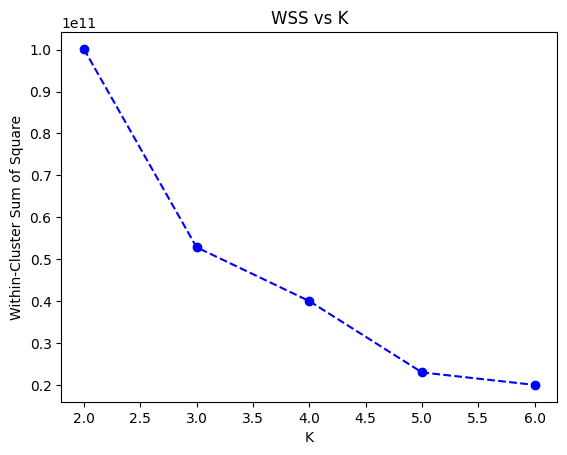

In [69]:
wss = []
for k in cluster:
    # model definition
    kmeans = KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

    # model training
    kmeans.fit(X)

    # validation
    wss.append(kmeans.inertia_)

# plot wss - Elbow Methods
plt.plot(cluster, wss, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Within-Cluster Sum of Square');
plt.title('WSS vs K');

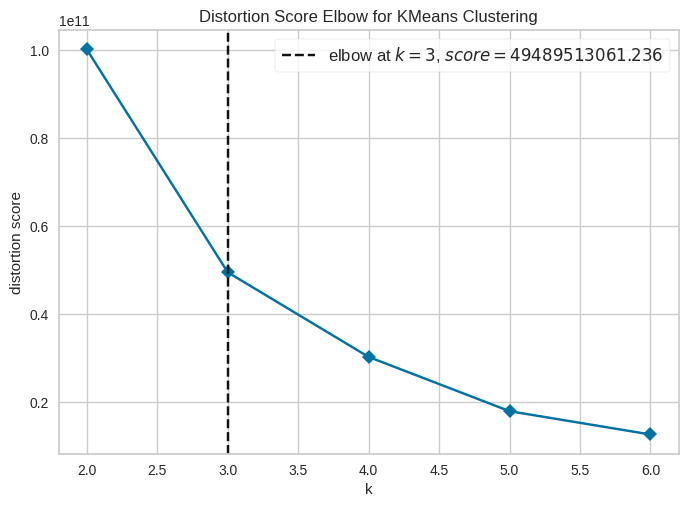

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
kmeans = KElbowVisualizer(KMeans(), k=cluster, timings=False)
kmeans.fit(X)
kmeans.show()

## 7.2 SILLHOUETTE SCORE

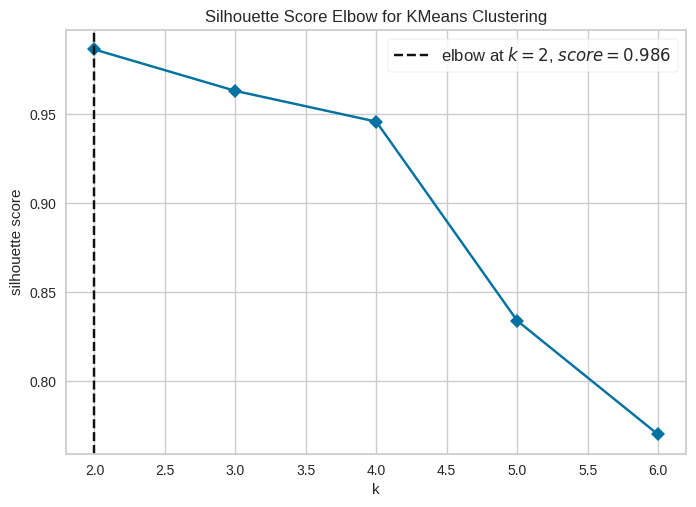

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [72]:
kmeans = KElbowVisualizer(KMeans(), k=cluster, metric='silhouette', timings=False)
kmeans.fit(X)
kmeans.show()

# 8.0 MODEL TRAINING

# 9.0 CLUSTER ANALYSIS

# 10.0 DEPLOY TO PRODUCTION